**Loading a dataset** 

In [1]:
# ! pip install ucimlrepo
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install numpy
# ! pip install scipy
# ! pip install scikit-learn

In [2]:
import warnings
import pandas as pd
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

warnings.filterwarnings("ignore")

adult = fetch_ucirepo(id=2) 

X = adult.data.features 
y = adult.data.targets 
  
adult_df = pd.concat([X, y], axis=1)
print(adult_df.shape)
adult_df.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:

adult_df.shape

(48842, 15)

In [4]:

adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:

adult_df = adult_df.drop(columns=['fnlwgt'])

In [7]:

adult_df.isnull().sum()

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [8]:

adult_df.duplicated().sum()

np.int64(4487)

In [9]:

numerical_columns = adult_df.select_dtypes(include=["int64"]).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [10]:
# locating outliers
Q1 = adult_df[numerical_columns].quantile(0.25)
Q3 = adult_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (adult_df[numerical_columns] < lower_bound) | (adult_df[numerical_columns] > upper_bound)
print(outliers_iqr.shape)

(48842, 5)


In [11]:
outliers_iqr.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,False,False,True,False,False
1,False,False,False,False,True
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [12]:
outlier_counts = outliers_iqr.sum()
print(outlier_counts)

age                 216
education-num      1794
capital-gain       4035
capital-loss       2282
hours-per-week    13496
dtype: int64


##  Handling Missing Data:
1. Identify missing or inconsistent data (e.g., represented by &quot;?&quot; in the dataset).
2. Replace missing values in the workclass and occupation columns using the
mode.
3. Drop rows with missing values in the native-country column.

In [13]:
null_values = adult_df.isnull().sum()
null_values
null_columns = null_values[null_values > 0]
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
workclass         963
occupation        966
native-country    274
dtype: int64


In [14]:
question_mark_columns = (adult_df == '?').sum()

columns_with_question_mark = question_mark_columns[question_mark_columns > 0]
print("Columns with '?' values:")
print(columns_with_question_mark)


Columns with '?' values:
workclass         1836
occupation        1843
native-country     583
dtype: int64


In [15]:
# replacing '?' with Null values
adult_df.replace('?', pd.NA, inplace=True)
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
question_mark_columns = (adult_df == '?').sum()
# question_mark_columns

columns_with_question_mark = question_mark_columns[question_mark_columns > 0]
print("Columns with '?' values:")
print(columns_with_question_mark)

Columns with '?' values:
Series([], dtype: int64)


In [17]:
null_values = adult_df.isnull().sum()
null_values
null_columns = null_values[null_values > 0]
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
workclass         2799
occupation        2809
native-country     857
dtype: int64


In [18]:
# replacing null values with mode
print("No of Null Values before cleaning: ", adult_df['workclass'].isnull().sum())
workclass_mode = adult_df['workclass'].mode()[0] 

adult_df['workclass'].fillna(workclass_mode, inplace=True)
print("No of Null Values after cleaning: ", adult_df['workclass'].isnull().sum())


No of Null Values before cleaning:  2799
No of Null Values after cleaning:  0


In [19]:
print("No of Null Values before cleaning: ", adult_df['occupation'].isnull().sum())
occupation_mode = adult_df['occupation'].mode()[0] 

adult_df['occupation'].fillna(occupation_mode, inplace=True)
print("No of Null Values before cleaning: ", adult_df['occupation'].isnull().sum())

No of Null Values before cleaning:  2809
No of Null Values before cleaning:  0


In [20]:
print("No of Null Values before cleaning: ", adult_df['native-country'].isnull().sum())
adult_df = adult_df.dropna(subset=['native-country'])
print("No of Null Values before cleaning: ", adult_df['native-country'].isnull().sum())

No of Null Values before cleaning:  857
No of Null Values before cleaning:  0


In [21]:
adult_df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [22]:
print(adult_df.shape)

(47985, 14)


## Removing Duplicates

In [23]:

adult_df.shape

(47985, 14)

In [24]:
adult_df.drop_duplicates(inplace = True)

In [25]:

adult_df.shape

(43428, 14)

In [26]:
adult_df.duplicated().sum()

np.int64(0)

## Encoding Categorical Data:
1. One-hot encode the categorical columns (marital-status,race,relationship,workclass, etc.).
2. Use label encoding for the income column, converting &quot;≤50K&quot; to 0 and
&quot;&gt;50K&quot; to 1.

In [27]:
# from sklearn.preprocessing import LabelEncoder

# adult_df ['marital-status'] = LabelEncoder().fit_transform(adult_df['marital-status'])
# adult_df['race'] = LabelEncoder().fit_transform(adult_df['race'])
# adult_df['relationship'] = LabelEncoder().fit_transform(adult_df['relationship'])
# adult_df['workclass'] = LabelEncoder().fit_transform(adult_df['workclass'])
# print(adult_df[['marital-status', 'race','relationship','workclass']].head(7))

In [28]:
from sklearn.preprocessing import LabelEncoder

adult_df_encoded = adult_df.copy()


categorical_columns = ['marital-status', 'race', 'relationship', 'workclass']

label_encoder = LabelEncoder()
for col in categorical_columns:
    adult_df_encoded[col] = label_encoder.fit_transform(adult_df[col])

print(adult_df_encoded[['marital-status', 'race', 'relationship', 'workclass']].head(7))


   marital-status  race  relationship  workclass
0               4     4             1          6
1               2     4             0          5
2               0     4             1          3
3               2     2             0          3
4               2     2             5          3
5               2     4             5          3
6               3     2             1          3


In [29]:
adult_df.head(6)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [30]:
adult_df= pd.get_dummies(adult_df, columns= ['sex']).replace({True: 1, False: 0})
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,sex_Female,sex_Male
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0


In [31]:
adult_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [32]:
adult_df['income'] = adult_df['income'].str.replace(r'\.$', '', regex=True).str.strip()

In [33]:
adult_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [34]:
adult_df['income_encoded'] = adult_df['income'].map({'<=50K': 0, '>50K': 1})

print(adult_df['income_encoded'].dtype)  # Should show int64 or float64
adult_df.head() # Verify column values

int64


,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,sex_Female,sex_Male,income_encoded
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0,0


In [35]:
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,sex_Female,sex_Male,income_encoded
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0,0


### Handling outliers:

Original dataset shape: (43428, 16)
Cleaned dataset shape after removing outliers: (20681, 16)


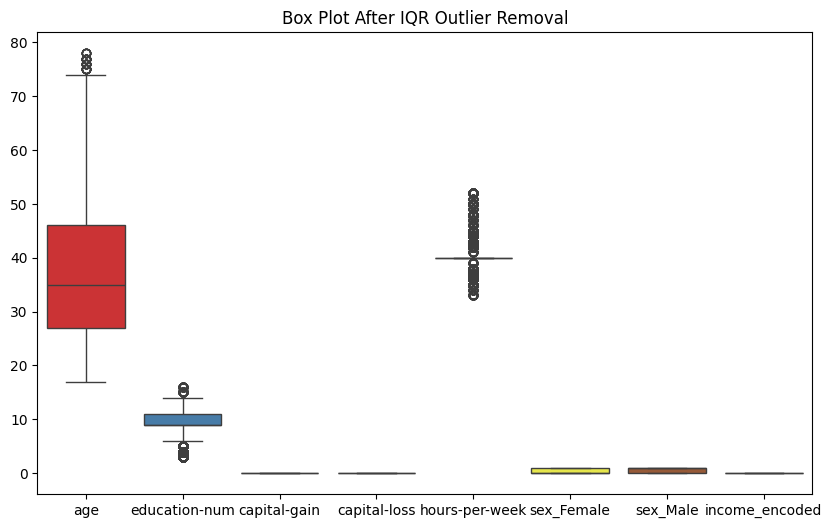

In [36]:
numerical_columns = adult_df.select_dtypes(include=[np.number]).columns

Q1 = adult_df[numerical_columns].quantile(0.25)
Q3 = adult_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for outliers
outliers_iqr = (adult_df[numerical_columns] < lower_bound) | (adult_df[numerical_columns] > upper_bound)

adult_df_cleaned = adult_df[~outliers_iqr.any(axis=1)]

print(f"Original dataset shape: {adult_df.shape}")
print(f"Cleaned dataset shape after removing outliers: {adult_df_cleaned.shape}")

# Visualizing after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=adult_df_cleaned[numerical_columns], palette='Set1')
plt.title('Box Plot After IQR Outlier Removal')
plt.show()


Original dataset shape: (43428, 16)
Cleaned dataset shape after IQR removal: (20681, 16)
Cleaned dataset shape after Z-score removal: (41575, 16)


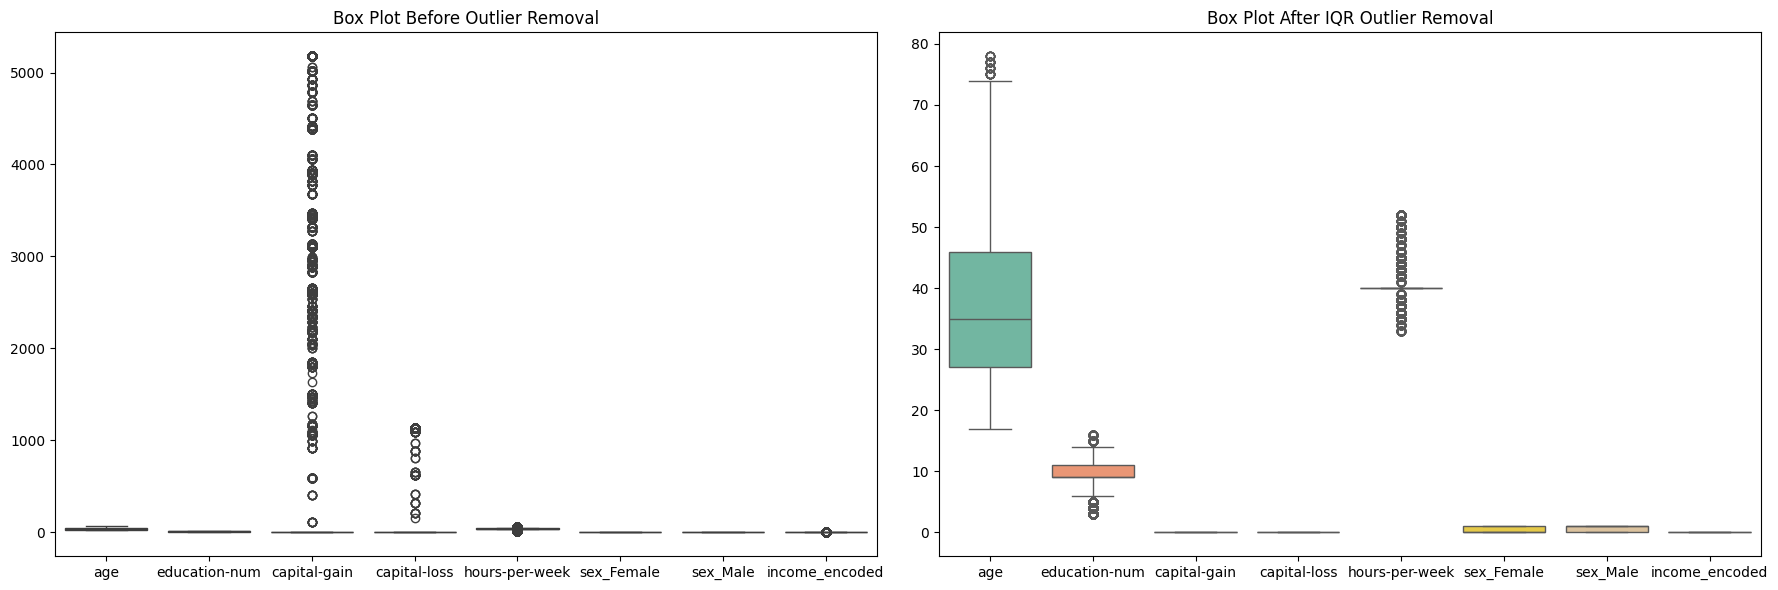

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize



# Select numerical columns
numerical_columns = adult_df.select_dtypes(include=[np.number]).columns

# Compute Q1, Q3, and IQR
Q1 = adult_df[numerical_columns].quantile(0.25)
Q3 = adult_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for outliers using IQR
outliers_iqr = (adult_df[numerical_columns] < lower_bound) | (adult_df[numerical_columns] > upper_bound)

adult_df_cleaned_iqr = adult_df[~outliers_iqr.any(axis=1)]

# Z-score method (less strict threshold to avoid full data loss)
z_score_threshold = 4  # Adjusted from 3 to 4 to retain more data
z_scores = np.abs(stats.zscore(adult_df[numerical_columns]))
adult_df_cleaned_z = adult_df[(z_scores < z_score_threshold).all(axis=1)]  

adult_df_winsorized = adult_df.copy()
for col in numerical_columns:
    adult_df_winsorized[col] = winsorize(adult_df[col], limits=[0.05, 0.05])  # Capping top/bottom 5%

print(f"Original dataset shape: {adult_df.shape}")
print(f"Cleaned dataset shape after IQR removal: {adult_df_cleaned_iqr.shape}")
print(f"Cleaned dataset shape after Z-score removal: {adult_df_cleaned_z.shape}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Before Outlier Removal
sns.boxplot(data=adult_df[numerical_columns], palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot Before Outlier Removal')


sns.boxplot(data=adult_df_cleaned_iqr[numerical_columns], palette='Set2', ax=axes[1])
axes[1].set_title('Box Plot After IQR Outlier Removal')

# # After Winsorization
# sns.boxplot(data=adult_df_winsorized[numerical_columns], palette='Set3', ax=axes[2])
# axes[2].set_title('Box Plot After Winsorization')

plt.tight_layout()
plt.show()


##  Normalization and Standardization:
1. Normalize the hours-per-week and capital-gain columns to a range [0, 1].
2. Standardize the age column to have a mean of 0 and a standard deviation of 1.

In [38]:
import pandas as pd


def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

columns_to_normalize = ['hours-per-week', 'capital-gain']

for column in columns_to_normalize:
    adult_df_encoded[column] = normalize_column(adult_df_encoded[column])


adult_df_encoded[columns_to_normalize].head()


,hours-per-week,capital-gain
0,0.397959,0.02174
1,0.122449,0.00000
2,0.397959,0.00000
3,0.397959,0.00000
4,0.397959,0.00000


In [39]:
def standardize_column(column):
    mean = column.mean()
    std_dev = column.std()
    return (column - mean) / std_dev

# Standardize the 'age' column
adult_df_encoded['age'] = standardize_column(adult_df_encoded['age'])

adult_df_encoded['age'].head()

0   -0.019370
1    0.779285
2   -0.091975
3    0.997100
4   -0.818025
Name: age, dtype: float64

## Validation

In [40]:
adult_df.shape

(43428, 16)

In [41]:
adult_df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
sex_Female        0
sex_Male          0
income_encoded    0
dtype: int64

In [42]:
adult_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

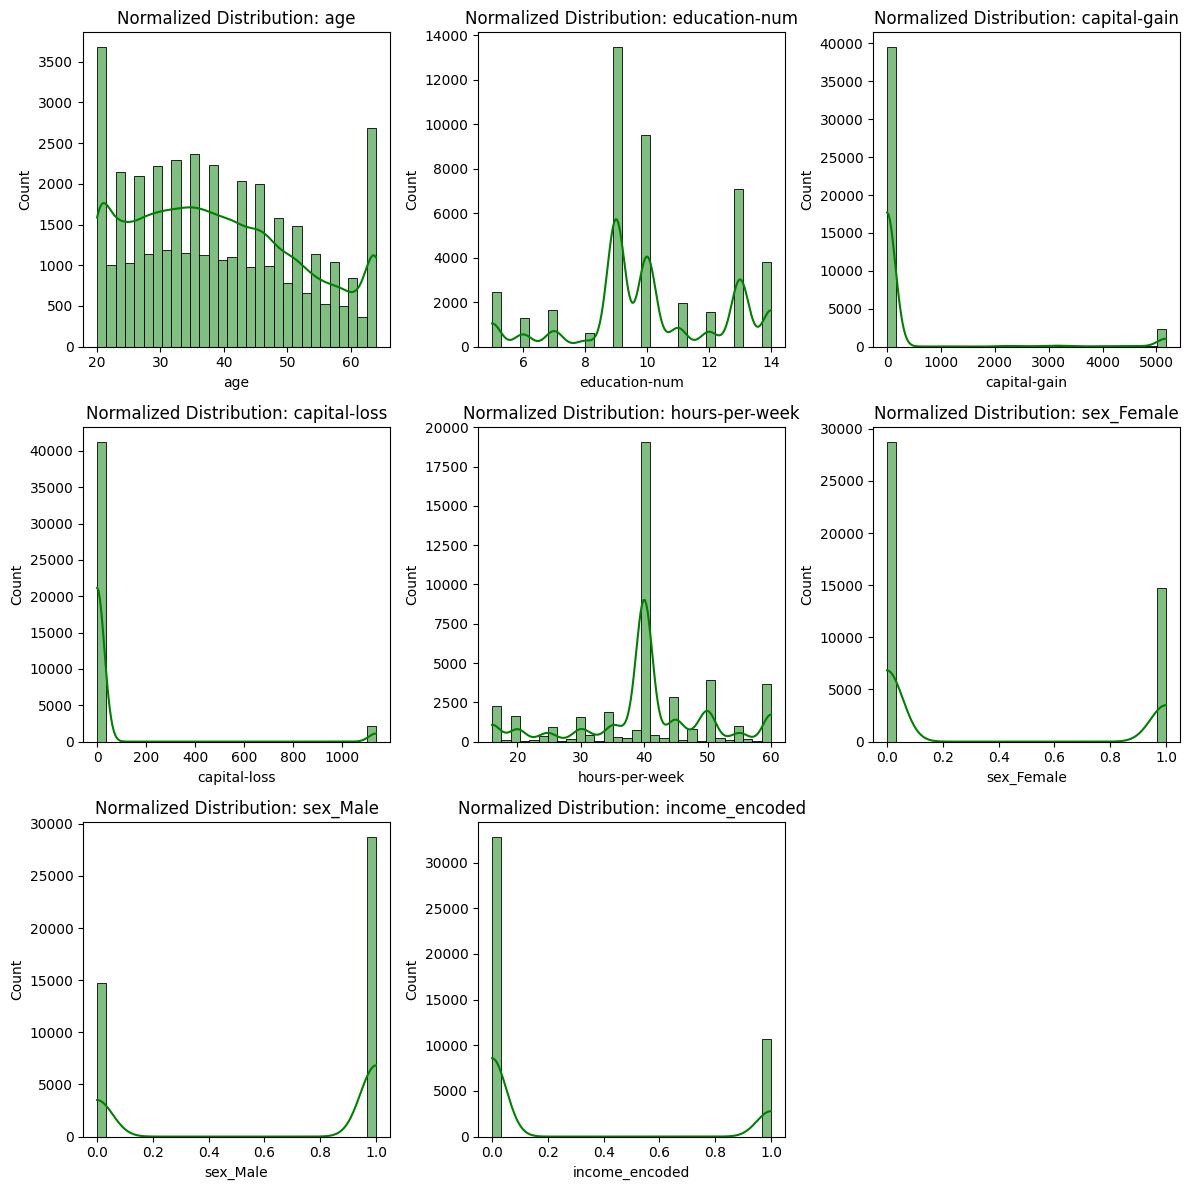

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns_to_normalize is a DataFrame
columns_to_normalize = adult_df[numerical_columns]  # Extract numerical columns

# Determine the number of columns to plot
num_cols = len(numerical_columns)

# Calculate the required number of rows
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensures enough rows

plt.figure(figsize=(12, num_rows * 4))  # Adjust height dynamically

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust based on actual number of columns
    sns.histplot(columns_to_normalize[col], kde=True, bins=30, color="green")
    plt.title(f'Normalized Distribution: {col}')

plt.tight_layout()
plt.show()


In [ ]:
! conda install nbconvert[qtpdf]